Name: Rajat Disawal
Class: D11ADA
Roll No: 13

### Aim: Use all 4 kernels to perform SVM

- Linear: 
```python
    svm.SVC(kernel='linear')
```
- Polynomial: 
```python
    svm.SVC(kernel='poly')
```
- Radial Basis Function (RBF): 
```python
    svm.SVC(kernel='rbf')
```
- Sigmoid: 
```python
    svm.SVC(kernel='sigmoid')
```

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
print('Libraries imported')

Libraries imported


In [25]:
import pandas as pd
csvData = pd.read_csv('Indian_Startup_Investment_Trends.csv')

csvData.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


In [26]:
print("\n🔹 Dataset Info:")
print(csvData.info())

# Display first few rows
print("\n🔹 First 5 Rows:")
print(csvData.head())

# Check for missing values
print("\n🔹 Missing Values:")
print(csvData.isnull().sum())

# Check unique values in categorical columns
print("\n🔹 Unique Values in Categorical Columns:")
categorical_columns = csvData.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {csvData[col].nunique()} unique values")

# Check value counts of the target variable
print("\n🔹 Exit_Status Value Counts:")
print(csvData['Exit_Status'].value_counts())

# Check summary statistics
print("\n🔹 Summary Statistics (Numerical Columns):")
print(csvData.describe())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup_ID              12428 non-null  object 
 1   Name                    12428 non-null  object 
 2   Sector                  12428 non-null  object 
 3   Sub-Sector              12428 non-null  object 
 4   City                    12428 non-null  object 
 5   State                   12428 non-null  object 
 6   Founded_Year            12428 non-null  int64  
 7   Founder_Name            12428 non-null  object 
 8   Funding_Stage           12428 non-null  object 
 9   Investment_Type         12428 non-null  object 
 10  Amount_Raised           12428 non-null  int64  
 11  Investors_Count         12428 non-null  int64  
 12  Lead_Investor           12428 non-null  object 
 13  Co-Investors            12428 non-null  object 
 14  Valuation_Post_Fundin

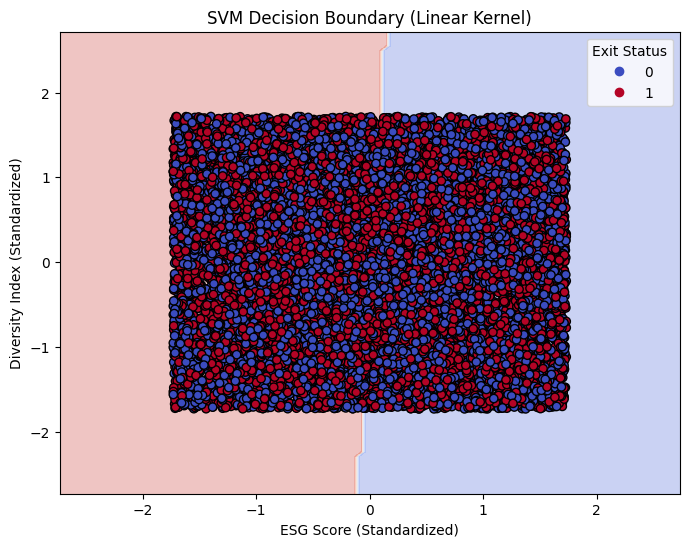

In [27]:
def train_plot_svm(dataframe):
    df = dataframe

    X = df[['ESG_Score', 'Diversity_Index']]
    
    y = LabelEncoder().fit_transform(df['Exit_Status'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_scaled, y)
    
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.xlabel('ESG Score (Standardized)')
    plt.ylabel('Diversity Index (Standardized)')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.legend(*scatter.legend_elements(), title="Exit Status")
    
    plt.show()


train_plot_svm(csvData)

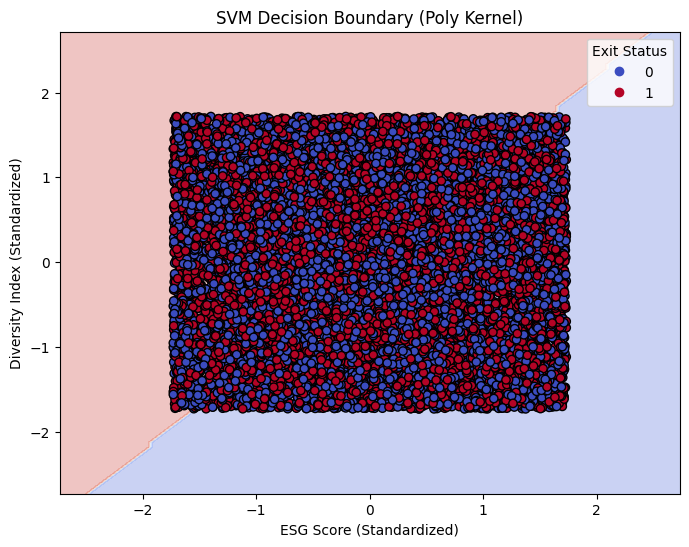

In [28]:
def train_plot_svm(dataframe):
    df = dataframe

    X = df[['ESG_Score', 'Diversity_Index']]
    
    y = LabelEncoder().fit_transform(df['Exit_Status'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_scaled, y)
    
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.xlabel('ESG Score (Standardized)')
    plt.ylabel('Diversity Index (Standardized)')
    plt.title('SVM Decision Boundary (Poly Kernel)')
    plt.legend(*scatter.legend_elements(), title="Exit Status")
    
    plt.show()


train_plot_svm(csvData)

In [ ]:
def train_plot_svm(dataframe):
    df = dataframe

    X = df[['ESG_Score', 'Diversity_Index']]
    
    y = LabelEncoder().fit_transform(df['Exit_Status'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_scaled, y)
    
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.xlabel('ESG Score (Standardized)')
    plt.ylabel('Diversity Index (Standardized)')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.legend(*scatter.legend_elements(), title="Exit Status")
    
    plt.show()


train_plot_svm(csvData)

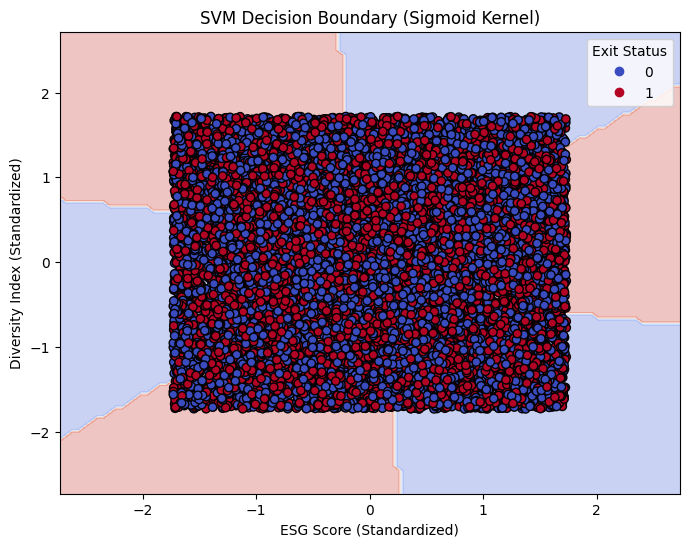

In [ ]:
def train_plot_svm(dataframe):
    df = dataframe

    X = df[['ESG_Score', 'Diversity_Index']]
    
    y = LabelEncoder().fit_transform(df['Exit_Status'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    svm_model = SVC(kernel='sigmoid')
    svm_model.fit(X_scaled, y)
    
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.xlabel('ESG Score (Standardized)')
    plt.ylabel('Diversity Index (Standardized)')
    plt.title('SVM Decision Boundary (Sigmoid Kernel)')
    plt.legend(*scatter.legend_elements(), title="Exit Status")
    
    plt.show()


train_plot_svm(csvData)